In [1]:
cd("C:\\Users\\matsuno\\Desktop\\data_analysis\\HMMBase.jl\\src")
include(".//HMMBase.jl")
using .HMMBase

using Distributions
using Random
using PyPlot

# univariate

In [10]:
a = [0.2, 0.8]
A = [0.9 0.1; 0.1 0.9]
B = [Normal(-1, 0.5), Normal(10, 3)]
hmm = HMM(a, A, B)

HMM{Univariate,Float64}([0.2, 0.8], [0.9 0.1; 0.1 0.9], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=-1.0, σ=0.5), Normal{Float64}(μ=10.0, σ=3.0)])

## fixed number of observations with fixed length

In [11]:
Random.seed!(1234)
z, y = rand(hmm, 500, 2, seq = true)
size(z)

(500, 2)

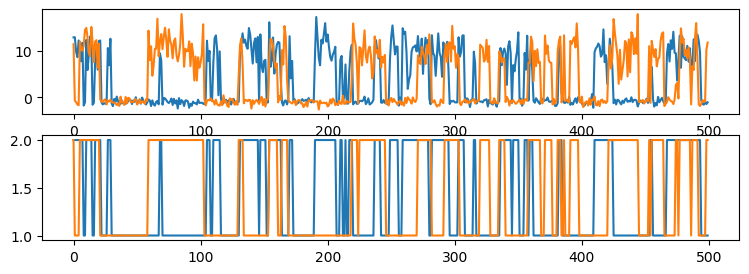

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062002E80>
 PyObject <matplotlib.lines.Line2D object at 0x0000000062011438>

In [12]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [13]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2, 2), (500, 2, 2), (500, 2, 2))

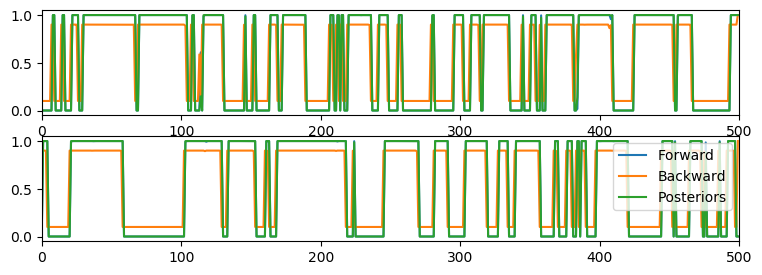

PyObject <matplotlib.legend.Legend object at 0x00000000620CE2E8>

In [14]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

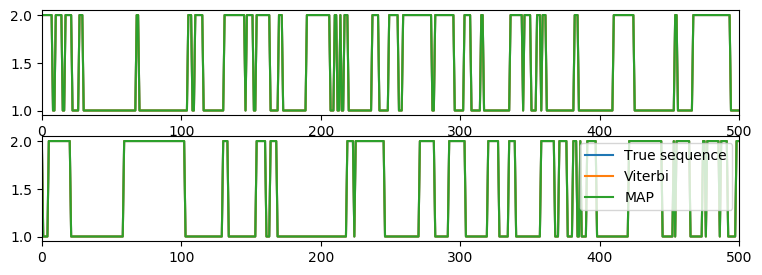

PyObject <matplotlib.legend.Legend object at 0x0000000062833240>

In [15]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [16]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 6 iterations, logtot = -1826.0887487248208


(HMM{Univariate,Float64}([0.0, 1.0], [0.9185501320226176 0.08144986797738249; 0.10501448407643893 0.894985515923561], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=-0.9607507709008049, σ=0.5108088552313563), Normal{Float64}(μ=9.893134992150513, σ=2.9513487413424504)]), Main.HMMBase.EMHistory(true, 6, [-1833.5872103079487, -1826.1091927153511, -1826.079049061509, -1826.0873606571574, -1826.0885988526566, -1826.0887487248208]))

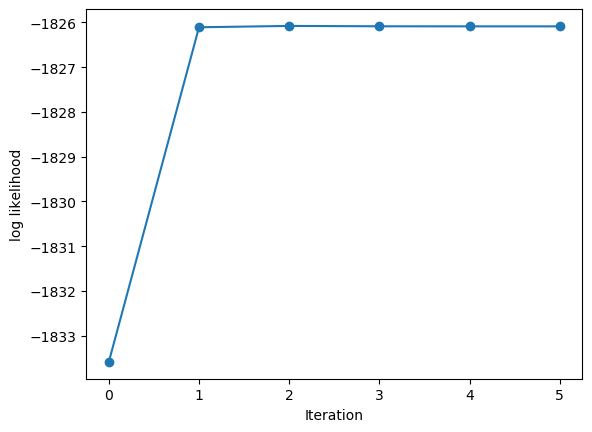

PyObject Text(24.0, 0.5, 'log likelihood')

In [17]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

## fixed number of observations with random length

In [18]:
Random.seed!(1234)
z, y = rand(hmm, Poisson(500), 2, seq = true)

(Union{Nothing, Int64}[2 2; 2 2; … ; 2 nothing; 2 nothing], Union{Nothing, Float64}[12.444284720036038 13.12332169030498; 11.46565280185212 15.531152115069274; … ; 10.067873808886167 nothing; 8.796539434931518 nothing])

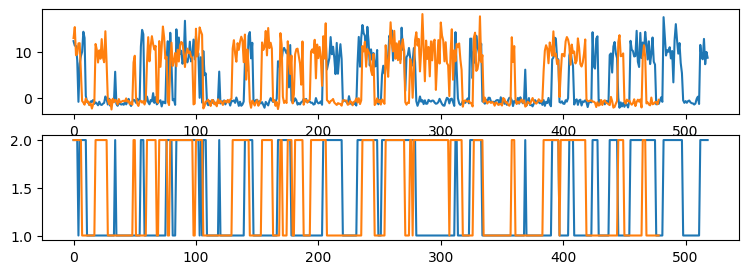

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000625E2E10>
 PyObject <matplotlib.lines.Line2D object at 0x0000000062DC1518>

In [19]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [20]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((519, 2, 2), (519, 2, 2), (519, 2, 2))

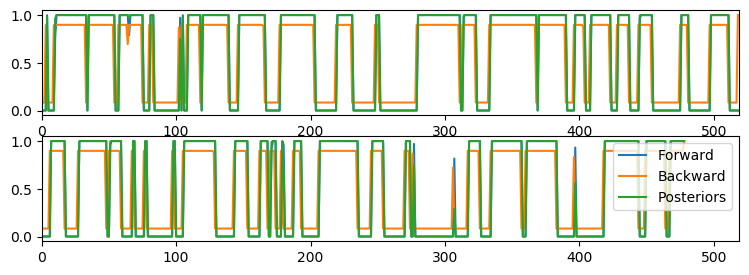

PyObject <matplotlib.legend.Legend object at 0x0000000062E4F3C8>

In [21]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

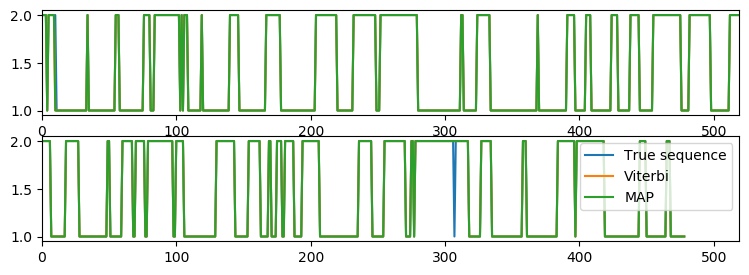

PyObject <matplotlib.legend.Legend object at 0x0000000062F6EBE0>

In [22]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [23]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 10 iterations, logtot = -1817.4498344180001


(HMM{Univariate,Float64}([0.0, 1.0], [0.9126271504956085 0.08737284950439159; 0.09922801117977051 0.9007719888202295], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=-0.967088700965017, σ=0.527589288466971), Normal{Float64}(μ=10.05168448016156, σ=2.962389759177027)]), Main.HMMBase.EMHistory(true, 10, [-3166.294607471621, -3105.9573439906944, -2799.456867475995, -2165.940307412997, -1818.564682438312, -1817.4809557676688, -1817.4428588335804, -1817.4470674518798, -1817.4492082971924, -1817.4498344180001]))

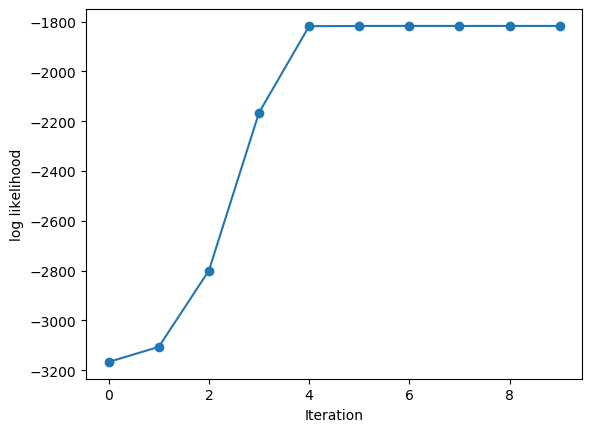

PyObject Text(24.0, 0.5, 'log likelihood')

In [24]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

# Multivariate

In [29]:
a = [0.6, 0.4]
A = [0.9 0.1; 0.1 0.9]
B = [MvNormal([0.0, 5.0], ones(2) * 1), MvNormal([0.0, 5.0], ones(2) * 3)]
hmm = HMM(a, A, B)
size(hmm) # (number of states, observations dimension)

(2, 2)

## fixed number of observations with fixed length

In [30]:
Random.seed!(1234)
z, y = rand(hmm, 500, 2, seq = true)
size(z)

(500, 2)

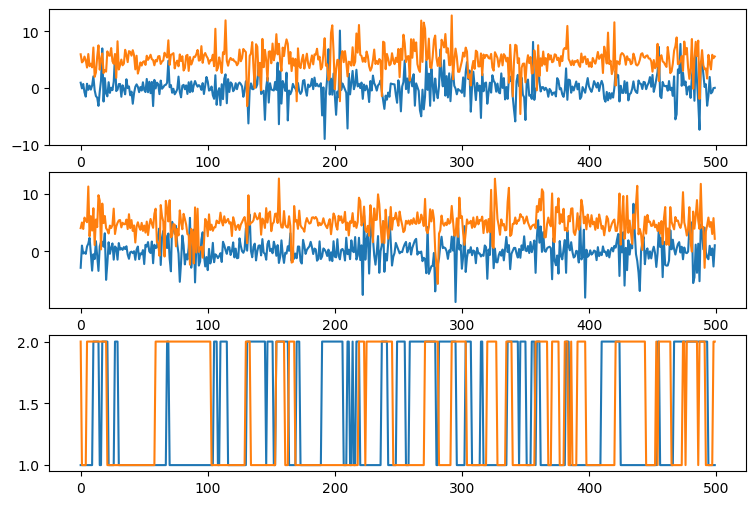

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002082978>
 PyObject <matplotlib.lines.Line2D object at 0x0000000002082EB8>

In [31]:
_, axes = subplots(nrows = 3, figsize = (9, 6))
axes[1].plot(y[:, :, 1])
axes[2].plot(y[:, :, 2])
axes[3].plot(z, linestyle = "-")

In [32]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2, 2), (500, 2, 2), (500, 2, 2))

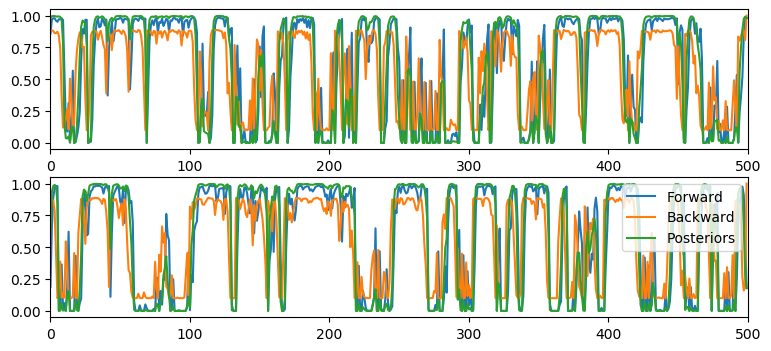

PyObject <matplotlib.legend.Legend object at 0x000000000210FE80>

In [33]:
_, axes = subplots(nrows = 2, figsize = (9, 4))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

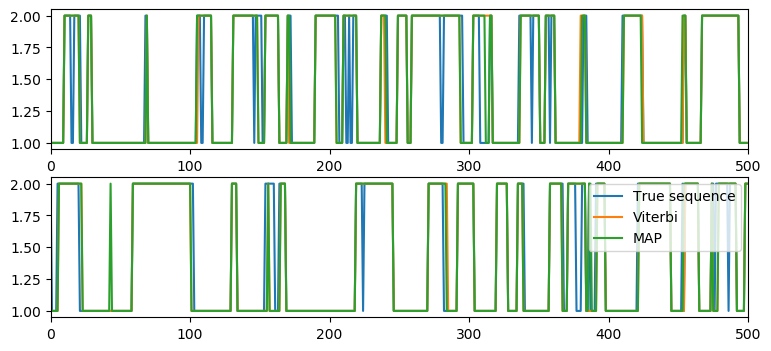

PyObject <matplotlib.legend.Legend object at 0x00000000021A4358>

In [34]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 4))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [35]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 18 iterations, logtot = -3995.9788314459925


(HMM{Multivariate,Float64}([0.9999999335475822, 6.645241774816214e-8], [0.9221335911805533 0.07786640881944662; 0.10062559356400727 0.8993744064359928], Distribution{Multivariate,S} where S<:ValueSupport[DiagNormal(
dim: 2
μ: [0.03821669296979303, 4.955515570472608]
Σ: [1.083092880485677 0.0; 0.0 0.9936338566053788]
)
, DiagNormal(
dim: 2
μ: [0.16064596116379873, 4.974211829026947]
Σ: [9.308653574739658 0.0; 0.0 9.765658080257534]
)
]), Main.HMMBase.EMHistory(true, 18, [-4231.112604656663, -4127.396803224933, -4055.2123894711385, -4018.529147021673, -4002.751101090202, -3996.9119755957026, -3995.462698505037, -3995.4168744574663, -3995.6187274011454, -3995.7810227559253, -3995.876941985023, -3995.927991118904, -3995.953980057547, -3995.9669477652383, -3995.9733592833404, -3995.9765165166764, -3995.97806871929, -3995.9788314459925]))

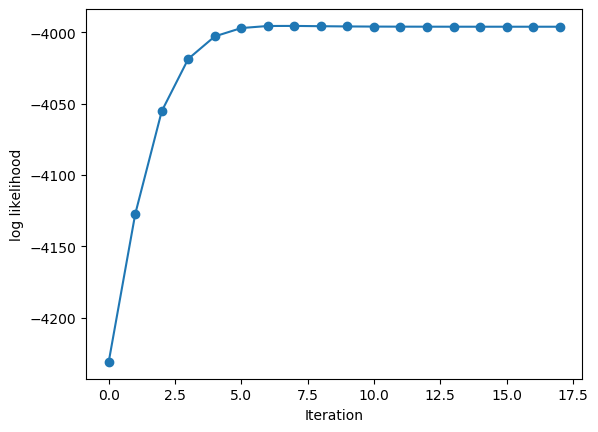

PyObject Text(24.0, 0.5, 'log likelihood')

In [36]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

## fixed number of observations with random length


In [37]:
Random.seed!(1234)
z, y = rand(hmm, Poisson(500), 2, seq = true)

(Union{Nothing, Int64}[1 1; 1 1; … ; 1 nothing; 1 nothing], Union{Nothing, Float64}[0.9378142524426818 7.1603412642592215; -0.2445830845722496 5.456248547197689; … ; -0.6794573666575289 5.2609144763809175; -1.0987104159191685 5.0768766116262976]

Union{Nothing, Float64}[2.399752616635875 4.557309526091927; 1.2604749506056312 5.055265268572561; … ; nothing nothing; nothing nothing])

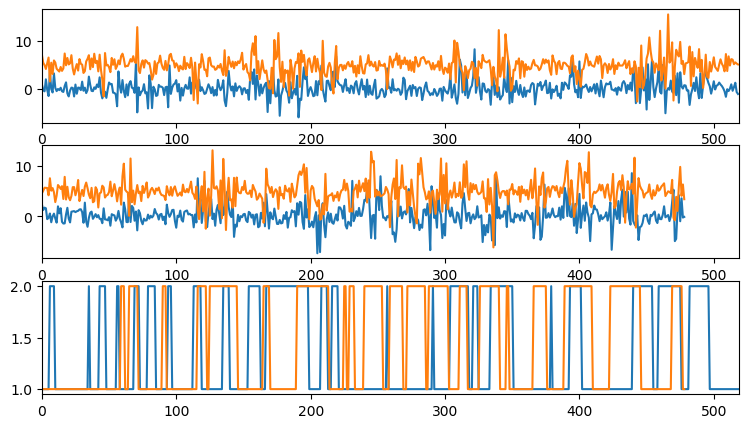

(0, 519)

In [38]:
_, axes = subplots(nrows = 3, figsize = (9, 5))
axes[1].plot(y[:, :, 1])
axes[1].set_xlim(0, size(y[:, :, 1], 1))
axes[2].plot(y[:, :, 2])
axes[2].set_xlim(0, size(y[:, :, 2], 1))
axes[3].plot(z, linestyle = "-")
axes[3].set_xlim(0, size(y[:, :, 1], 1))

In [39]:
# not implemented yet...

α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

MethodError: MethodError: no method matching -(::Nothing, ::Float64)
Closest candidates are:
  -(!Matched::Float64, ::Float64) at float.jl:403
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:307
  -(!Matched::Missing, ::Number) at missing.jl:115
  ...